T= 0.009999999776482582


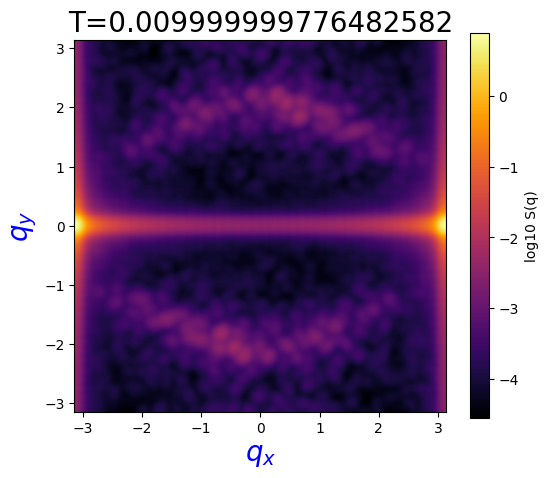

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# --------------------------
# Parameters
# --------------------------
Lx=400       # number of lattice sites in x
Ly=400       # number of lattice sites in y
sigma=4.0   # Gaussian smoothing in q-space (pixels)
use_log =True  # True: log scale, False: linear

# --------------------------
# Load data
# --------------------------
# Assuming your file has columns: T, i, j, sx, sy, sz
data = np.loadtxt("spin_dynamics")
i = data[:,1].astype(int)
j = data[:,2].astype(int)
sx = data[:,3]
sy = data[:,4]
sz = data[:,5]
T=   data[1,0]

# --------------------------
# Compute S(q)
# --------------------------
# Initialize spin lattice
Sx = np.zeros((Lx,Ly))
Sy = np.zeros((Lx,Ly))
Sz = np.zeros((Lx,Ly))

# Fill lattice
for idx in range(len(i)):
    Sx[i[idx]%Lx, j[idx]%Ly] = sx[idx]
    Sy[i[idx]%Lx, j[idx]%Ly] = sy[idx]
    Sz[i[idx]%Lx, j[idx]%Ly] = sz[idx]

# Compute Fourier transform
Sq_x = np.fft.fft2(Sx)
Sq_y = np.fft.fft2(Sy)
Sq_z = np.fft.fft2(Sz)

# Shift zero frequency to center
Sq_x = np.fft.fftshift(Sq_x)
Sq_y = np.fft.fftshift(Sq_y)
Sq_z = np.fft.fftshift(Sq_z)

# Compute total S(q)
Sq = (np.abs(Sq_x)**2 + np.abs(Sq_y)**2 + np.abs(Sq_z)**2)/ (Lx*Ly)

# Optional smoothing
Sq_smooth = gaussian_filter(Sq, sigma=sigma)

# --------------------------
# Plot
# --------------------------
fig, ax = plt.subplots(figsize=(6,5))

# Decide scale
if use_log:
    im = ax.imshow(np.log10(Sq_smooth + 1e-8), origin='lower', cmap='inferno', 
                   extent=[-np.pi, np.pi, -np.pi, np.pi])
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('log10 S(q)')
else:
    im = ax.imshow(Sq_smooth, origin='lower', cmap='inferno', 
                   extent=[-np.pi, np.pi, -np.pi, np.pi])
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('S(q)')
font1={'family':'serif','color':'blue','size':10}
font2={'family':'serif','color':'darkred','size':10}

plt.xlabel("Average Pulse",fontdict=font1,fontsize=20)
plt.ylabel("Calorie Burnage",fontdict=font1,fontsize=20)
ax.set_xlabel('$q_x$')
ax.set_ylabel('$q_y$')
plt.title('T='+str(T),fontsize=20)
#ax.set_title('T='str(T))
plt.savefig('Sq_31.png',bbox_inches = 'tight')
print('T=',T)
plt.show()


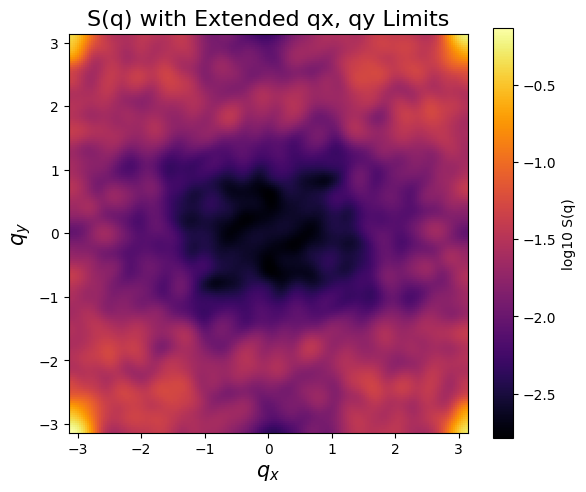

T= 0.009999999776482582


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# --------------------------
# Parameters
# --------------------------
Lx = 200  # number of lattice sites in x
Ly = 200  # number of lattice sites in y
sigma = 4.0  # Gaussian smoothing in q-space (pixels)
use_log = True  # True: log scale, False: linear

# --------------------------
# Lattice Vectors
# --------------------------
a1 = np.array([1.0, 0.0])  # First real-space lattice vector
a2 = np.array([0.5, np.sqrt(3)/2])  # Second real-space lattice vector

# Reciprocal lattice vectors (using standard honeycomb lattice)
area = a1[0] * a2[1] - a1[1] * a2[0]
b1 = 2 * np.pi * np.array([a2[1], -a2[0]]) / area  # Reciprocal lattice vector b1
b2 = 2 * np.pi * np.array([-a1[1], a1[0]]) / area  # Reciprocal lattice vector b2

# --------------------------
# Load data
# --------------------------
# Assuming your file has columns: T, i, j, sx, sy, sz
data = np.loadtxt("spin_dynamics.txt")
i = data[:, 1].astype(int)
j = data[:, 2].astype(int)
sx = data[:, 3]
sy = data[:, 4]
sz = data[:, 5]
T = data[1, 0]

# --------------------------
# Compute S(q)
# --------------------------
# Initialize spin lattice
Sx = np.zeros((Lx, Ly))
Sy = np.zeros((Lx, Ly))
Sz = np.zeros((Lx, Ly))

# Fill lattice
for idx in range(len(i)):
    Sx[i[idx] % Lx, j[idx] % Ly] = sx[idx]
    Sy[i[idx] % Lx, j[idx] % Ly] = sy[idx]
    Sz[i[idx] % Lx, j[idx] % Ly] = sz[idx]

# Compute Fourier transform
Sq_x = np.fft.fft2(Sx)
Sq_y = np.fft.fft2(Sy)
Sq_z = np.fft.fft2(Sz)

# Shift zero frequency to center
Sq_x = np.fft.fftshift(Sq_x)
Sq_y = np.fft.fftshift(Sq_y)
Sq_z = np.fft.fftshift(Sq_z)

# Compute total S(q)
Sq = (np.abs(Sq_x)**2 + np.abs(Sq_y)**2 + np.abs(Sq_z)**2) / (Lx * Ly)

# Optional smoothing
Sq_smooth = gaussian_filter(Sq, sigma=sigma)

# --------------------------
# Plot
# --------------------------
fig, ax = plt.subplots(figsize=(6, 5))

# Decide scale
if use_log:
    im = ax.imshow(np.log10(Sq_smooth + 1e-8), origin='lower', cmap='inferno',
                   extent=[-np.pi, np.pi, -np.pi, np.pi])
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('log10 S(q)')
else:
    im = ax.imshow(Sq_smooth, origin='lower', cmap='inferno',
                   extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('S(q)')
    
plt.xlabel('$q_x$', fontsize=15)
plt.ylabel('$q_y$', fontsize=15)
ax.set_title('S(q) with Extended qx, qy Limits', fontsize=16)

# Save and show plot
plt.tight_layout()
plt.savefig('Sq_SL4.png', bbox_inches='tight')
plt.show()

print('T=', T)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Number of spins in x and y direction (grid)
L = 10  # Grid size
N = L * L  # Total number of spins

# Create random spin vectors (simplified to 2D vectors for illustration)
spins = np.random.choice([-1, 1], size=(N, 2))

# Define the lattice positions for the spins (simple square lattice)
x = np.linspace(0, L-1, L)
y = np.linspace(0, L-1, L)
positions = np.array([(i, j) for i in x for j in y])

# Function to calculate structure factor S(q)
def structure_factor(qx, qy):
    S_q = 0
    for i in range(N):
        for j in range(N):
            # Calculate distance vector between spins i and j
            r_ij = positions[i] - positions[j]
            r_ij_q = np.dot(r_ij, [qx, qy])
            S_q += np.dot(spins[i], spins[j]) * np.exp(1j * r_ij_q)
    return np.abs(S_q)**2 / N

# Calculate S(q) for different values of qx, qy
q_values = np.linspace(-np.pi, np.pi, 100)
S_q_values = []

for qx in q_values:
    for qy in q_values:
        S_q_values.append(structure_factor(qx, qy))

# Reshape S_q_values for plotting
S_q_values = np.array(S_q_values).reshape((len(q_values), len(q_values)))

# Plot the structure factor
plt.imshow(S_q_values, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower')
plt.colorbar(label=r'$S(q)$')
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title('Structure Factor $S(q)$')
plt.show()


KeyboardInterrupt: 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read spin configuration and positions from a file
def read_data(file_path):
    data = np.loadtxt(spin_dynamics.txt)
    positions = data[:, 1:2]  # Assuming first two columns are positions (x, y)
    spins = data[:, 3:5]  # Assuming next columns are spin values (S_x, S_y) or (S_x, S_y, S_z)
    return positions, spins

# Function to calculate the structure factor S(q) from real-space spin configuration
def calculate_Sq(spins, positions, q_values):
    """
    Calculate the structure factor S(q) for a given spin configuration.

    Parameters:
    spins (ndarray): Array of spin vectors (N x 2) or (N x 3) for each spin.
    positions (ndarray): Array of positions (N x 2) or (N x 3) for each spin.
    q_values (ndarray): List of q-values for which S(q) will be calculated.

    Returns:
    S_q (ndarray): Array of structure factor values for the given q-values.
    """
    N = len(spins)
    S_q = np.zeros_like(q_values, dtype=complex)

    # Calculate the structure factor S(q) for each q-value
    for k, q in enumerate(q_values):
        qx, qy = q
        for i in range(N):
            for j in range(N):
                # Distance vector between positions i and j
                r_ij = positions[i] - positions[j]
                r_ij_q = np.dot(r_ij, [qx, qy])
                # Spin-spin correlation and exponential term
                S_q[k] += np.dot(spins[i], spins[j]) * np.exp(1j * r_ij_q)

    return np.abs(S_q)**2 / N

# Path to your data file
file_path = 'your_data_file.txt'  # Change this to the path of your data file

# Read the positions and spins from the file
positions, spins = read_data(file_path)

# Define the range of q-values (in the Brillouin zone)
q_values = np.array([(qx, qy) for qx in np.linspace(-np.pi, np.pi, 100) for qy in np.linspace(-np.pi, np.pi, 100)])

# Calculate S(q) for each q-value
S_q_values = calculate_Sq(spins, positions, q_values)

# Reshape S_q_values for plotting
S_q_values = np.reshape(S_q_values, (100, 100))

# Plot the structure factor S(q)
plt.imshow(S_q_values, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower', aspect='auto')
plt.colorbar(label=r'$S(q)$')
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title(r'Structure Factor $S(q)$')
plt.show()


NameError: name 'spin_dynamics' is not defined